# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scaling
from sklearn.preprocessing import MinMaxScaler

#applying grid search cv to find the best hyper parameters for model
from sklearn.model_selection import RandomizedSearchCV

# Fit models
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

#Removing Warnings
import warnings
warnings.filterwarnings('ignore')

# Store Dataset

In [2]:
data = pd.read_excel('storedata.csv')

In [3]:
data

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,South Benfleet,UK,96853,Vitï¿½ria,7,14120,110,Yes,13,Retail Park,1665074,1240813,1141898,1041041,6,202,18,14,Bad
132,Sandy,UK,96858,Matï¿½as,6,11205,103,No,15,Shopping Centre,1657769,1424404,1378708,1160929,5,203,13,18,Bad
133,Sheerness,UK,98062,Gustavo,7,16190,115,No,19,Shopping Centre,1407456,1359511,1200486,1063718,7,341,18,18,Bad
134,Salford,UK,98923,Rafael,6,15516,113,No,17,High Street,1451087,1245725,1127276,1045154,11,261,14,10,Bad


The dataset consist of 136 rows and 19 columns

# Understanding the Store Dataset

In [11]:
#Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Town                136 non-null    object
 1   Country             136 non-null    object
 2   Store ID            136 non-null    int64 
 3   Manager name        136 non-null    object
 4   Staff               136 non-null    int64 
 5   Floor Space         136 non-null    int64 
 6   Window              136 non-null    int64 
 7   Car park            136 non-null    object
 8   Demographic score   136 non-null    int64 
 9   Location            136 non-null    object
 10  40min population    136 non-null    int64 
 11  30 min population   136 non-null    int64 
 12  20 min population   136 non-null    int64 
 13  10 min population   136 non-null    int64 
 14  Store age           136 non-null    int64 
 15  Clearance space     136 non-null    int64 
 16  Competition number  136 no

Attribut Information: 
    Store Dataset consist of 13 continuous feature and 6 categorical feature.

In [13]:
#Checking for duplicate
data.duplicated().sum()

0

There is no duplicates values present in dataset

In [14]:
#Checking Null values
data.isnull().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

There is no null values present in dataset

In [15]:
#Function to get statistical summary of the dataset
def statistical_summary(x):
    Mode = x.value_counts(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(),len(np.unique(x)),
                      Mode.iloc[0,0], Mode.iloc[0,1], round((Mode.iloc[0,1]*100)/x.count(),2)],
                      index = ['Count', 'Miss','Unique', 'MODE', 'FREQ', 'PERC'])

In [16]:
#Getting statiscal summary of the mushroom dataset
data.apply(statistical_summary).T

,Count,Miss,Unique,MODE,FREQ,PERC
Town,136,0,136,Sheringham,1,0.74
Country,136,0,2,UK,134,98.53
Store ID,136,0,136,61950,1,0.74
Manager name,136,0,118,Sarah,3,2.21
Staff,136,0,8,7,29,21.32
Floor Space,136,0,135,13532,2,1.47
Window,136,0,25,109,11,8.09
Car park,136,0,4,Yes,94,69.12
Demographic score,136,0,10,17,18,13.24
Location,136,0,4,Shopping Centre,52,38.24


The above chart shows statistical measure of attributes in dataset. Measure are Count, Unique Vlaues, Mode etc

# Exploratory Data Analysis

In [17]:
data.head(5)

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


Good    69
Bad     67
Name: Performance, dtype: int64


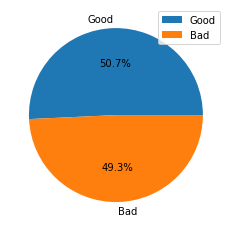

In [18]:
#Total Good and Bad Performance
print(data['Performance'].value_counts())
plt.pie(data['Performance'].value_counts(), labels = ['Good','Bad'], autopct='%.1f%%')
plt.legend()
plt.show()

From above chart we can say that, we have provided with 50.7% as Good Performance data and rest 49.3% as Bad Performance data

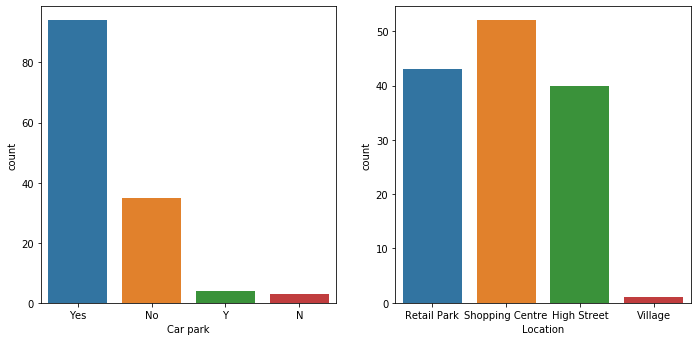

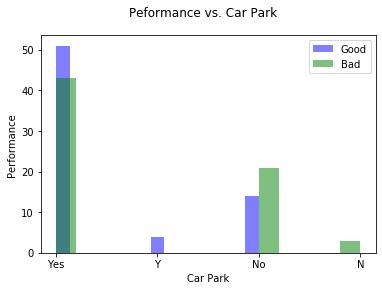

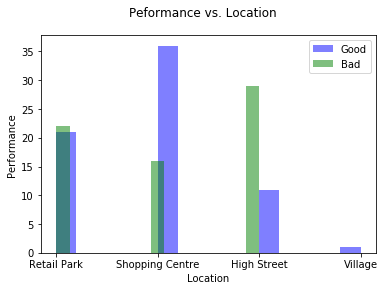

In [5]:
#Count Plot
fig = plt.figure(figsize = (18,12))

ax1 = fig.add_subplot(2,3,1)
sns.countplot(data = data, x = 'Car park', ax=ax1)

ax2 = fig.add_subplot(2,3,2)
sns.countplot(data = data, x = 'Location', ax=ax2)

#Sub Plot
fig, ax = plt.subplots()

ax.hist(data[data["Performance"]=='Good']["Car park"], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(data[data["Performance"]=='Bad']["Car park"], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Car Park")
ax.set_ylabel("Performance")

fig.suptitle("Peformance vs. Car Park")

ax.legend();

#Sub Plot
fig, ax = plt.subplots()

ax.hist(data[data["Performance"]=='Good']["Location"], bins=15, alpha=0.5, color="blue", label="Good")
ax.hist(data[data["Performance"]=='Bad']["Location"], bins=15, alpha=0.5, color="green", label="Bad")

ax.set_xlabel("Location")
ax.set_ylabel("Performance")

fig.suptitle("Peformance vs. Location")

ax.legend();

From above plot we can say that people prefer to visit store that have car parking and store is in shopping centre
From above plot we can see that store in shopping centre has Good Performance and Store in High Street has Bad Perforance 

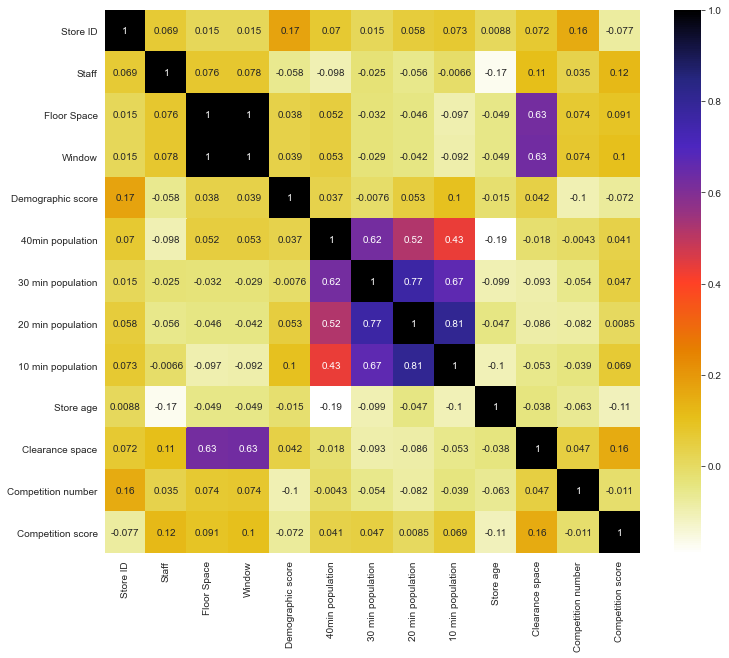

In [101]:
#Correlation 
#Displaying Correlation between varaibles using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [120]:
#This function filters out most correlated variables, threshold values is decided by us like 80% or more than that 
def correlation(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [121]:
#Getting ALL feature who are correlated to each other and had correlation values more than 80%
corr_feature = correlation(data, 0.75)
len(set(corr_feature))

3

In [122]:
#Displaying all highly correlated variables
print(corr_feature)

{'Window', '10 min population', '20 min population'}


In [123]:
#Dropping all correlated variables because they all are having same effects over target variables and have no use in model building
data.drop(corr_feature,axis=1,inplace=True)

Features selected on the basis of Pearson Correlation, and the features having correlation value more than 75% are dropped from the dataset as the have same effect over target variable and hence can be dropped from dataset

# Feature Engineering

In [124]:
#dropping columns that will not add any value to prediction 
data.drop(labels=['Town','Country','Store ID','Manager name'],axis=1,inplace=True) 

In [125]:
#Converting Y to Yes and N to No
data['Car park'] = data['Car park'].replace({"Y":"Yes","N":"No"})

In [126]:
data

,Staff,Floor Space,Car park,Demographic score,Location,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,Yes,10,Retail Park,1288374,1138224,3,238,16,16,Good
1,8,18569,Yes,11,Shopping Centre,1086225,1015321,4,384,15,19,Good
2,-2,12288,No,12,Retail Park,1595638,1281661,11,219,13,18,Bad
3,7,17092,No,14,High Street,1179395,1022959,5,261,15,12,Bad
4,7,11307,No,18,Retail Park,1398558,1085170,7,200,19,13,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...
131,7,14120,Yes,13,Retail Park,1665074,1240813,6,202,18,14,Bad
132,6,11205,No,15,Shopping Centre,1657769,1424404,5,203,13,18,Bad
133,7,16190,No,19,Shopping Centre,1407456,1359511,7,341,18,18,Bad
134,6,15516,No,17,High Street,1451087,1245725,11,261,14,10,Bad


In [127]:
#Getting list of categorical variable
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['Car park', 'Location', 'Performance'], dtype='object')


In [128]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Converting all categorical variable to numerical values
for feat in objList:
    data[feat] = le.fit_transform(data[feat])



In [129]:
data.head(5)

,Staff,Floor Space,Car park,Demographic score,Location,40min population,30 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,9,18526,1,10,1,1288374,1138224,3,238,16,16,1
1,8,18569,1,11,2,1086225,1015321,4,384,15,19,1
2,-2,12288,0,12,1,1595638,1281661,11,219,13,18,0
3,7,17092,0,14,0,1179395,1022959,5,261,15,12,0
4,7,11307,0,18,1,1398558,1085170,7,200,19,13,0


# Data Preparation, Scaling and Spliting


In [133]:
# Distinguish the feature and target set and divide the data set into training and test sets

X = data.drop('Performance',axis='columns')
y = data['Performance']


# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
X = trans.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((108, 11), (28, 11), (108,), (28,))

Used MinMax Scaler to Normalize the value between [0,1]

# Model Building

Decision Tree Classifier

In [141]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": range(1, 9),
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

In [142]:
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
  

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': range(1, 9),
                                        'min_samples_leaf': range(1, 9)})

In [143]:
  # Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 4, 'max_features': 6, 'max_depth': 3, 'criterion': 'entropy'}
Best score is 0.6692640692640692


In [144]:
#Prediction using Test Dataste
y_pred = tree_cv.predict(X_test)

In [145]:
#Accuracy on the basis of predicted values with respective to true values
dt_acc = accuracy_score(y_test,y_pred)
dt_acc

0.6071428571428571

Text(70.0, 0.5, 'Truth')

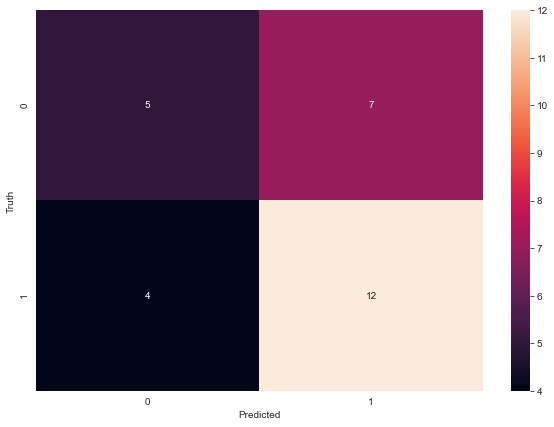

In [146]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Logistic Regression

In [147]:
# Fitting Logistic Regression

LogReg = LogisticRegression()

In [148]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)

In [150]:
randomizedsearch = RandomizedSearchCV(LogReg, hyperparameters)
best_model_random = randomizedsearch.fit(X_train, y_train)
print(best_model_random.best_estimator_)

LogisticRegression(C=10000.0, solver='liblinear')


C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Himanshu\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means

In [151]:
#Predict values based on new parameters
y_pred_lr = randomizedsearch.predict(X_test)

In [152]:
# New Model Evaluation metrics 
lr_acc = accuracy_score(y_test, y_pred_lr)
lr_acc

0.8214285714285714

Text(70.0, 0.5, 'Truth')

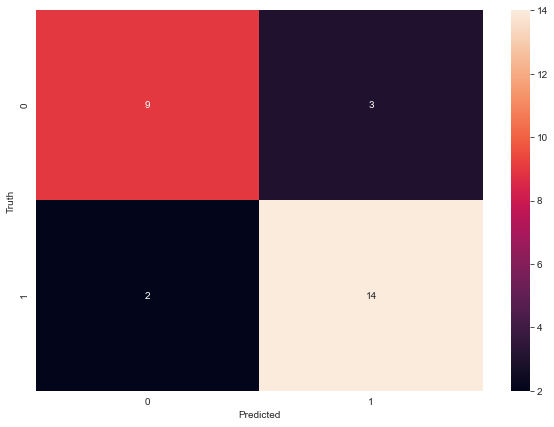

In [153]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Artificial Neural Network technique

In [154]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\Himanshu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Himanshu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Himanshu\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Himanshu\anaconda3\lib\site-packages\tensorflow\python\framewo

In [156]:
# creating the model
model = Sequential()

from keras.layers import Dropout

# first hidden layer
model.add(Dense(11,activation = 'relu', input_dim = 11))
#model.add(Dropout(0.1))

# second hidden layer
model.add(Dense(8, activation = 'relu'))
#model.add(Dropout(0.1))

# output layer
model.add(Dense(1,activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(X_train, y_train, batch_size = 20, epochs = 100)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/100
108/108 [==============================] - 0s 4ms/step - loss: 0.6878 - acc: 0.5463
Epoch 2/100
108/108 [==============================] - 0s 120us/step - loss: 0.6764 - acc: 0.5648
Epoch 3/100
108/108 [==============================] - 0s 102us/step - loss: 0.6709 - acc: 0.5833
Epoch 4/100
108/108 [==============================] - 0s 120us/step - loss: 0.6659 - acc: 0.5741
Epoch 5/100
108/108 [==============================] - 0s 148us/step - loss: 0.6620 - acc: 0.5926
Epoch 6/100
108/108 [==============================] - 0s 111us/step - loss: 0.6603 - acc: 0.5926
Epoch 7/100
108/108 [==============================] - 0s 120us/step - loss: 0.6559 - acc: 0.6019
Epoch 8/100
108/108 [==============================] - 0s 129us/step - loss: 0.6522 - acc: 0.5833
Epoch 9/100
108/108 [==============================] - 0s 148us/step - loss: 0.6490 - acc: 0.6296
Epoch 10/100
108/108

In [157]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 7ms/step


[0.5229002237319946, 0.75]

In [159]:
# Manually verifying some predictions
yp = model.predict(X_test)
yp[:10]

array([[0.30315435],
       [0.56977254],
       [0.848286  ],
       [0.40419352],
       [0.94628197],
       [0.6620076 ],
       [0.59169006],
       [0.9291948 ],
       [0.80335796],
       [0.2152181 ]], dtype=float32)

In [160]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

[0, 1, 1, 0, 1, 1, 1, 1, 1, 0]

In [161]:
ann_acc = accuracy_score(y_test,y_pred)
ann_acc

0.75

Text(70.0, 0.5, 'Truth')

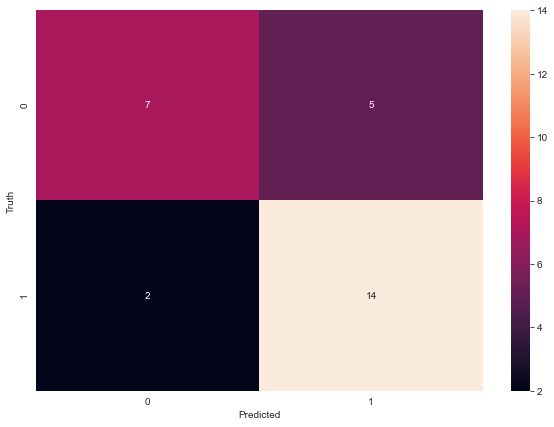

In [162]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Displaying the Result of All the three classifier Used.

In [163]:
#Getting accuracy and log loss for each model
model_data = pd.DataFrame({'Classifiers' : ['LogisticRegression', 'DecisionTreeClassifier', 'ArtificialNeuralNetwork'],
                        'Accuracy %' : [lr_acc,dt_acc,ann_acc]})

In [164]:
model_data['Accuracy %'] = model_data['Accuracy %'].apply(lambda x : round((x*100),2))

In [165]:
model_data

,Classifiers,Accuracy %
0,LogisticRegression,82.14
1,DecisionTreeClassifier,60.71
2,ArtificialNeuralNetwork,75.00


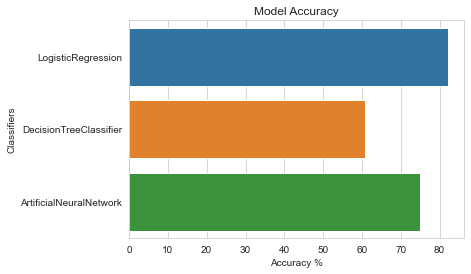

In [166]:
#Visualizing the accuracy and log loss of each model
sns.barplot(data = model_data, x = model_data['Accuracy %'], y = model_data.Classifiers)
plt.title('Model Accuracy')
plt.show()

From above Results we can say that Logistic Regression works well as it gains an accuracy score of 82.14% and rest algorithms Decision Tree Classifier attains an accuracy score of 60.71% and Artificial Neural Network attains an accuarcy of 75%.